In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])


-19.28552082286504 51.01550565003609
49.329759456831425 -20.78913517329906
-83.9894826832263 160.27291460493012
-6.525759987214457 -115.05681773964535
-23.18122764660791 124.55792067721421
20.667151766374516 17.450538232078117
24.249900165069604 -79.23735836675678
-76.16593515455065 -164.36673098285982
14.932355957268356 88.2389160975012
39.01064455708496 38.42432367218635
51.8262309957355 -21.973313808774947
84.28838789607192 -175.70045004707342
-72.34029839076499 -115.32227346615659
70.3734553011742 -112.40270399397531
-30.17297741533821 -165.6172371556473
-83.49381294074723 -127.80946264079381
-10.96932054888957 -63.55639617700366
-10.568070648002177 -78.86800757656931
-24.31276795669288 -96.00510617074417
-88.77626275772577 124.58042160982393
68.68426421880369 -104.13140875590761
17.734686772623704 -142.91783391898977
13.868030041854723 -20.451725161291392
-27.56104675100397 -166.5549250641803
83.57658333643516 -40.2603121975618
-73.14938746569308 139.07489058371272
-58.45735659296

-79.94295054039902 -40.00120915941261
-38.219965256802766 28.879418407315825
-67.16805421423874 -30.847792587090936
-37.34509030757483 -61.63043041689744
36.55755361507073 58.24736874595675
-80.56339497824254 -73.42334652985885
66.78225905475611 7.244544924829341
-62.74907781071754 -87.85054964069938
53.22752837830876 -112.68140520972273
25.08854653600011 -163.68788351639557
2.5625585136349542 -93.38207451203304
-38.77693121171703 30.748863390125393
31.1728887333597 114.44328891911334
75.79399765656109 -128.94514696868865
47.851086841015075 -62.288131840102864
63.59194684746609 42.497540377996245
-53.12650501200481 -95.53195787528024
-20.134173275837085 -39.336346615733305
-54.322016852729114 -3.5475429523222317
29.268511845793682 -116.42571850015051
58.47443203764129 60.84820010659655
-31.527070885150152 152.32328815640426
21.792593543711575 45.2451228779089
29.258048440779703 -102.44755469046633
81.63741236198538 39.97240791130213
89.3559594345617 16.918355175874666
0.770237059938168

In [20]:
from citipy import citipy

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

619

In [22]:
# Import requests library and key.
import requests
from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [24]:
# Import the time library and the datetime module from the datetime library.
import time
from datetime import datetime

In [25]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count += 1
        time.sleep(60)
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        #Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | andevoranto
City not found. Skipping...
Processing Record 2 of Set 1 | dingle
Processing Record 3 of Set 1 | bluff
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | broome
Processing Record 6 of Set 1 | faya
Processing Record 7 of Set 1 | alice town
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | sompeta
Processing Record 10 of Set 1 | malatya
Processing Record 11 of Set 1 | vestmannaeyjar
Processing Record 12 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | yellowknife
Processing Record 15 of Set 1 | avarua
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | ariquemes
Processing Record 18 of Set 1 | huarmey
Processing Record 19 of Set 1 | pisco
Processing Record 20 of Set 1 | new norfolk
Processing Record 21 of Set 1 | hilo
Processing Record 22 of Set 1 | vi

Processing Record 187 of Set 4 | ponta do sol
Processing Record 188 of Set 4 | peleduy
Processing Record 189 of Set 4 | bambous virieux
Processing Record 190 of Set 4 | fevralsk
City not found. Skipping...
Processing Record 191 of Set 4 | uyemskiy
Processing Record 192 of Set 4 | isangel
Processing Record 193 of Set 4 | khilok
Processing Record 194 of Set 4 | laguna
Processing Record 195 of Set 4 | kodiak
Processing Record 196 of Set 4 | ruston
Processing Record 197 of Set 4 | tapaua
City not found. Skipping...
Processing Record 198 of Set 4 | narsaq
Processing Record 199 of Set 4 | geraldton
Processing Record 200 of Set 4 | amderma
City not found. Skipping...
Processing Record 201 of Set 4 | mbanza-ngungu
Processing Record 202 of Set 4 | la reforma
Processing Record 203 of Set 4 | suntar
Processing Record 205 of Set 5 | thaton
Processing Record 206 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 207 of Set 5 | boulder
Processing Record 208 of Set 5 | alto araguaia
Pro

Processing Record 374 of Set 8 | moerai
Processing Record 375 of Set 8 | liverpool
Processing Record 376 of Set 8 | anchorage
Processing Record 377 of Set 8 | apt
Processing Record 378 of Set 8 | jalu
Processing Record 379 of Set 8 | waidhofen
Processing Record 380 of Set 8 | biltine
Processing Record 381 of Set 8 | hofn
Processing Record 382 of Set 8 | kalmunai
Processing Record 383 of Set 8 | petropavlovsk-kamchatskiy
Processing Record 384 of Set 8 | guane
Processing Record 385 of Set 8 | turukhansk
Processing Record 386 of Set 8 | sorvag
City not found. Skipping...
Processing Record 387 of Set 8 | synya
Processing Record 388 of Set 8 | gualaquiza
Processing Record 389 of Set 8 | la baule-escoublac
Processing Record 390 of Set 8 | lapy
Processing Record 391 of Set 8 | walvis bay
Processing Record 392 of Set 8 | la joya
Processing Record 393 of Set 8 | skibbereen
Processing Record 394 of Set 8 | irece
Processing Record 395 of Set 8 | komsomolskiy
Processing Record 396 of Set 8 | araou

Processing Record 563 of Set 12 | boden
Processing Record 564 of Set 12 | seara
Processing Record 565 of Set 12 | sundargarh
Processing Record 566 of Set 12 | ancud
Processing Record 567 of Set 12 | tupik
Processing Record 568 of Set 12 | xichang
Processing Record 569 of Set 12 | acarau
Processing Record 570 of Set 12 | guiratinga
Processing Record 571 of Set 12 | sakakah
Processing Record 572 of Set 12 | phangnga
Processing Record 573 of Set 12 | kisangani
Processing Record 574 of Set 12 | puerto madryn
Processing Record 575 of Set 12 | awash
Processing Record 576 of Set 12 | castelo do piaui
Processing Record 577 of Set 12 | mahaicony
City not found. Skipping...
Processing Record 578 of Set 12 | tostamaa
City not found. Skipping...
Processing Record 579 of Set 12 | maceio
Processing Record 580 of Set 12 | kota belud
Processing Record 581 of Set 12 | kibala
Processing Record 582 of Set 12 | banda aceh
Processing Record 583 of Set 12 | chanika
Processing Record 584 of Set 12 | ahumada


In [26]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,10.9995,122.6711,86.65,72,93,9.24,PH,2022-07-17 05:04:32
1,Bluff,-46.6000,168.3333,51.80,78,97,16.55,NZ,2022-07-17 05:04:33
2,Atuona,-9.8000,-139.0333,77.79,72,41,15.12,PF,2022-07-17 05:04:33
3,Broome,42.2506,-75.8330,68.00,81,0,4.61,US,2022-07-17 05:04:33
4,Faya,18.3851,42.4509,73.92,24,35,5.73,SA,2022-07-17 05:04:34
5,Alice Town,25.7167,-79.3000,83.55,75,100,14.18,BS,2022-07-17 05:04:34
6,Mataura,-46.1927,168.8643,51.48,82,86,4.43,NZ,2022-07-17 05:04:35
7,Sompeta,18.9333,84.6000,82.58,81,100,6.06,IN,2022-07-17 05:04:35
8,Malatya,38.5000,38.0000,71.65,41,0,5.75,TR,2022-07-17 05:04:36
9,Vestmannaeyjar,63.4427,-20.2734,50.45,80,42,2.24,IS,2022-07-17 05:04:36


In [27]:
# Reorder the columns.
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dingle,PH,2022-07-17 05:04:32,10.9995,122.6711,86.65,72,93,9.24
1,Bluff,NZ,2022-07-17 05:04:33,-46.6000,168.3333,51.80,78,97,16.55
2,Atuona,PF,2022-07-17 05:04:33,-9.8000,-139.0333,77.79,72,41,15.12
3,Broome,US,2022-07-17 05:04:33,42.2506,-75.8330,68.00,81,0,4.61
4,Faya,SA,2022-07-17 05:04:34,18.3851,42.4509,73.92,24,35,5.73
5,Alice Town,BS,2022-07-17 05:04:34,25.7167,-79.3000,83.55,75,100,14.18
6,Mataura,NZ,2022-07-17 05:04:35,-46.1927,168.8643,51.48,82,86,4.43
7,Sompeta,IN,2022-07-17 05:04:35,18.9333,84.6000,82.58,81,100,6.06
8,Malatya,TR,2022-07-17 05:04:36,38.5000,38.0000,71.65,41,0,5.75
9,Vestmannaeyjar,IS,2022-07-17 05:04:36,63.4427,-20.2734,50.45,80,42,2.24


In [28]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [29]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

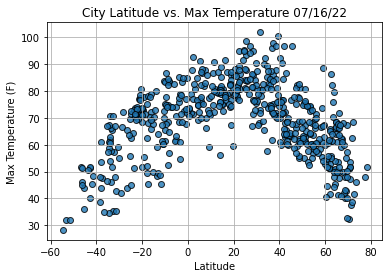

In [31]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

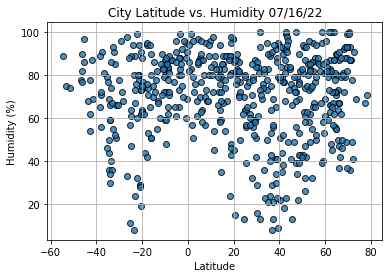

In [32]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
           humidity,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

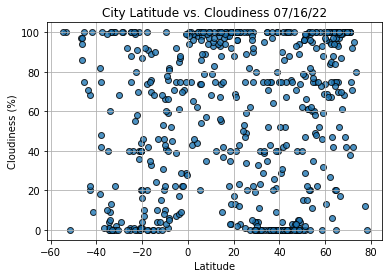

In [34]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

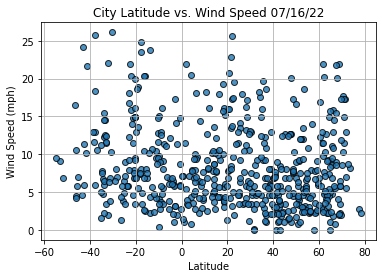

In [35]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
           wind_speed,
           edgecolor="black", linewidths=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()